## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [164]:
# your code here
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')

In [3]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [4]:
data.isna().count()

status                     1000
duration                   1000
credit_history             1000
purpose                    1000
amount                     1000
savings                    1000
employment_duration        1000
installment_rate           1000
personal_status_sex        1000
other_debtors              1000
present_residence          1000
property                   1000
age                        1000
other_installment_plans    1000
housing                    1000
number_credits             1000
job                        1000
people_liable              1000
telephone                  1000
foreign_worker             1000
credit_risk                1000
dtype: int64

In [5]:
data.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [6]:
data.groupby(by='purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [7]:
data[data['age'] < 30]['housing'].value_counts(normalize=True)

rent        0.666667
for free    0.306233
own         0.027100
Name: housing, dtype: float64

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [8]:
data[(data['number_credits'] == '4-5') | (data['number_credits'] == '>= 6')]['foreign_worker'].value_counts()

no     33
yes     1
Name: foreign_worker, dtype: int64

In [9]:
data.groupby(by='foreign_worker')['number_credits'].value_counts(normalize=True).apply(lambda x: x * 100)

foreign_worker  number_credits
no              1                 63.136033
                2-3               33.437175
                4-5                2.803738
                >= 6               0.623053
yes             1                 67.567568
                2-3               29.729730
                4-5                2.702703
Name: number_credits, dtype: float64

In [10]:
data['number_credits'].value_counts()

1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64

### Задание 6 (1 балл)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

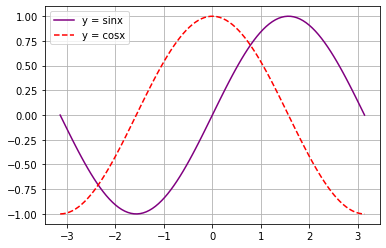

In [12]:
x = np.linspace(-np.pi, np.pi,100)
y = np.sin(x)
y1 = np.cos(x)
plt.plot(x,y, "purple",label = 'y = sinx')
plt.grid(True)
plt.plot(x,y1,"r--", label = 'y = cosx')
plt.legend()


In [13]:
import seaborn as sns

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

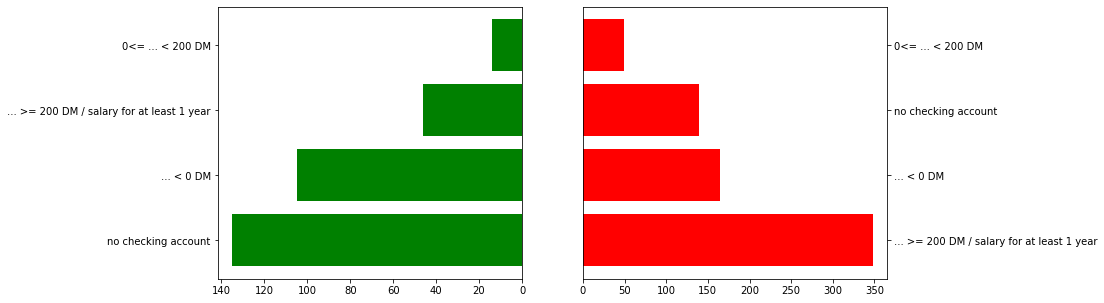

In [14]:
f, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].barh(data[data['credit_risk'] == 'bad']['status'].value_counts().index,data[data['credit_risk'] == 'bad']['status'].value_counts(),color='green')
axes[0].invert_xaxis()
axes[1].barh(data[data['credit_risk'] == 'good']['status'].value_counts().index,data[data['credit_risk'] == 'good']['status'].value_counts(), color='red')
axes[1].yaxis.tick_right()

In [15]:
data[data['credit_risk'] == 'good']['status'].value_counts().index


Index(['... >= 200 DM / salary for at least 1 year', '... < 0 DM',
       'no checking account', '0<= ... < 200 DM'],
      dtype='object')

### Задание 8  (0.5 балла)

In [16]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<AxesSubplot:xlabel='savings', ylabel='count'>

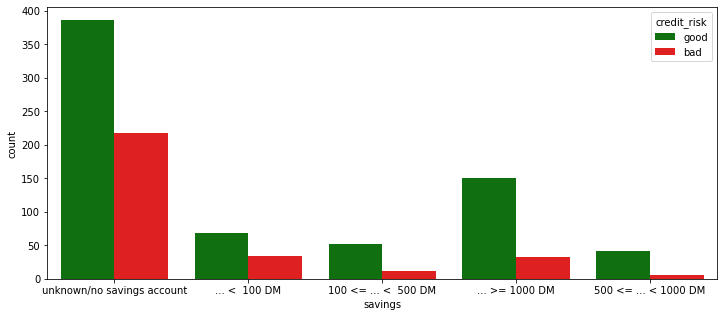

In [19]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='savings',y='count', hue="credit_risk", data=data, estimator=len,palette=['green','red'], ax=ax)


In [18]:
data['count'] = (np.ones(len(data['status'])))

In [ ]:
data['count']

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<AxesSubplot:xlabel='savings', ylabel='age'>

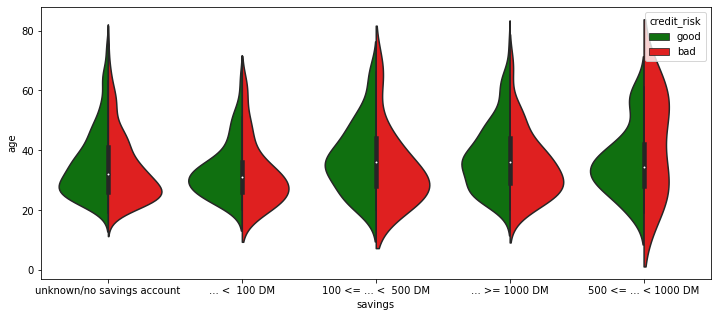

In [20]:
fig, ax = plt.subplots(figsize=(12,5))
sns.violinplot(x='savings',y='age', hue="credit_risk", data=data,palette=['green','red'], split=True,ax=ax)


### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

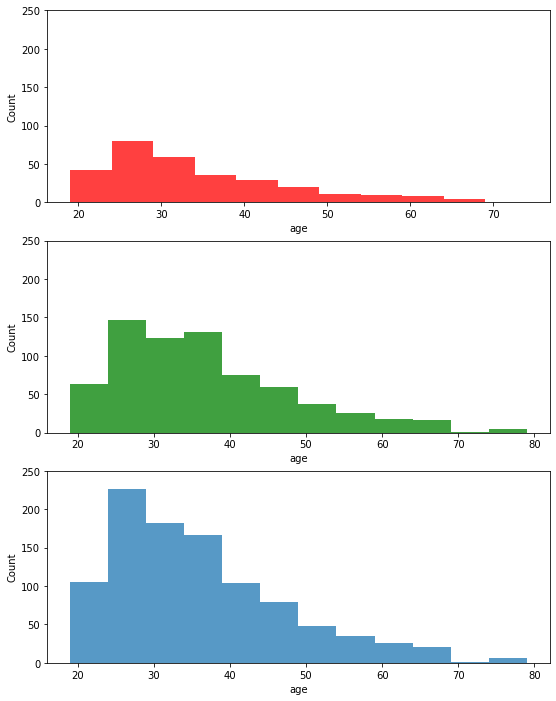

In [48]:
f, ax = plt.subplots(3,1,figsize=(9,12))
sns.histplot(data[data['credit_risk'] == 'bad']['age'],ax=ax[0],color='red',linewidth=0,binwidth=5)

sns.histplot(data[data['credit_risk'] == 'good']['age'], ax=ax[1], color='green',linewidth=0,binwidth=5)

sns.histplot(data['age'], ax=ax[2],linewidth=0,binwidth=5)
for i in range(len(ax)):
    ax[i].set_ylim(top=250)

In [ ]:
data[data['credit_risk'] == 'bad']['age'].value_counts()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

<AxesSubplot:xlabel='amount', ylabel='duration'>

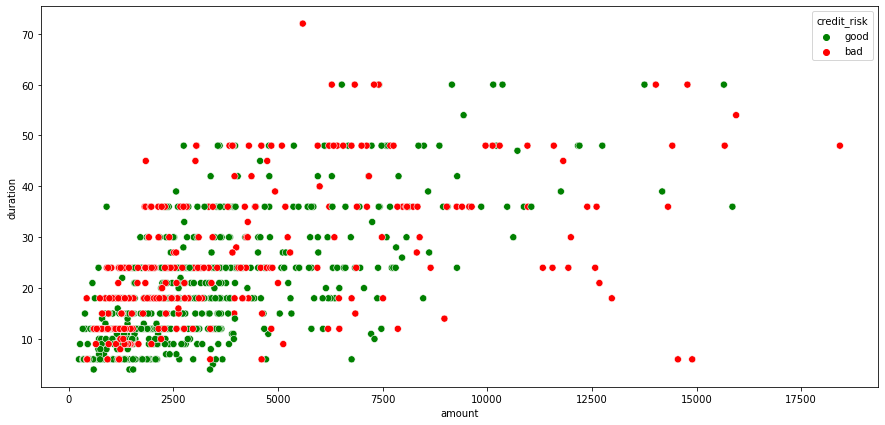

In [62]:
f, ax = plt.subplots(figsize=(15,7))
sns.scatterplot(x='amount',y='duration',data=data,hue='credit_risk',palette=['green','red'],s=50)

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

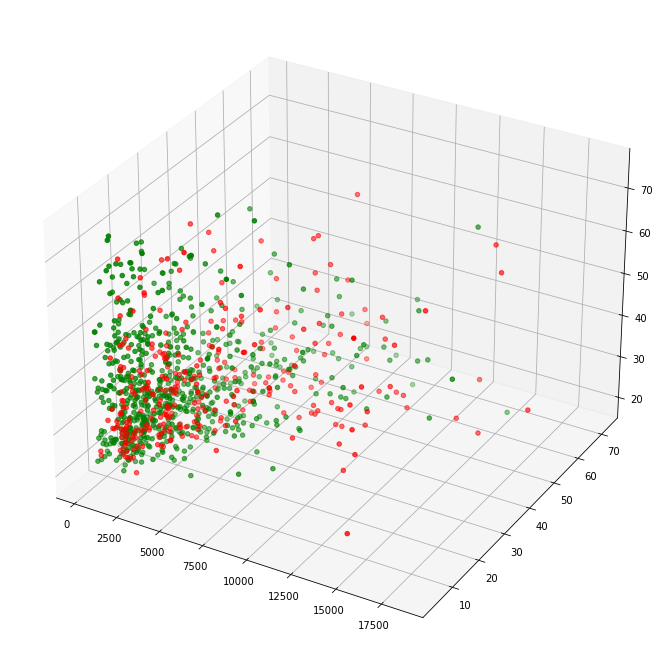

In [88]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
x = data[data['credit_risk'] == 'bad']['amount']
y = data[data['credit_risk'] == 'bad']['duration']
z = data[data['credit_risk'] == 'bad']['age']
ax.scatter(x, y, z, c='red', marker='o')
x = data[data['credit_risk'] == 'good']['amount']
y = data[data['credit_risk'] == 'good']['duration']
z = data[data['credit_risk'] == 'good']['age']
ax.scatter(x, y, z, c='green', marker='o')

In [78]:
from mpl_toolkits.mplot3d import Axes3D

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [165]:
objects = data.drop(columns=data.dtypes[data.dtypes!= 'object'].index)

In [199]:
for column in (objects):
    objects = pd.concat([objects,pd.get_dummies(column).iloc[:,0:-1]])

MemoryError: Unable to allocate 5.49 GiB for an array with shape (45, 16384002) and data type float64

In [ ]:
objects

In [119]:
 data['credit_risk'].replace({'good':1,'bad':0}, inplace=True)


In [138]:
status = pd.get_dummies(data['status']).drop(columns='no checking account')

In [139]:
data.merge(status, left_on=data.index, right_on=status.index)

,key_0,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,count,... < 0 DM,... >= 200 DM / salary for at least 1 year,0<= ... < 200 DM
0,0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,...,1,skilled employee/official,0 to 2,no,no,1,1.0,0,0,0
1,1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,...,2-3,skilled employee/official,3 or more,no,no,1,1.0,0,0,0
2,2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,...,1,unskilled - resident,0 to 2,no,no,1,1.0,1,0,0
3,3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,...,2-3,unskilled - resident,3 or more,no,yes,1,1.0,0,0,0
4,4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,...,2-3,unskilled - resident,0 to 2,no,yes,1,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,...,1,unskilled - resident,3 or more,no,no,0,1.0,0,0,0
996,996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,...,1,skilled employee/official,0 to 2,no,no,0,1.0,0,0,0
997,997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,...,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,0,1.0,0,1,0
998,998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,...,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,0,1.0,1,0,0


2
3
4
5
6


In [ ]:
data['personal_status_sex'] = data['personal_status_sex'].apply(lambda x: x.split(' : '))

In [152]:

sex = []
is_single = []
for row in data['personal_status_sex']:
    sex.append(row[0])
    is_single.append(row[1::])
data['sex'] = sex
data['is_single'] = is_single

In [161]:
data.drop(columns=[])

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,count,sex,is_single
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,"[female, non-single or male, single]",none,...,for free,1,skilled employee/official,0 to 2,no,no,1,1.0,female,"[non-single or male, single]"
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,"[male, married/widowed]",none,...,for free,2-3,skilled employee/official,3 or more,no,no,1,1.0,male,[married/widowed]
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,"[female, non-single or male, single]",none,...,for free,1,unskilled - resident,0 to 2,no,no,1,1.0,female,"[non-single or male, single]"
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,"[male, married/widowed]",none,...,for free,2-3,unskilled - resident,3 or more,no,yes,1,1.0,male,[married/widowed]
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,"[male, married/widowed]",none,...,rent,2-3,unskilled - resident,0 to 2,no,yes,1,1.0,male,[married/widowed]


In [163]:
data.shape

(1000, 24)

In [113]:
data.dtypes[data.dtypes!= 'object'].index


Index(['duration', 'amount', 'age', 'count'], dtype='object')

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
def predict(Xtest: np.array) -> np.array:
йfrom sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))